# Multilayer feedforward network example
This is a simple implementation of multilayer feed forward network. Flexible enough to change make easy changes to the architecture, but simple enough to have browse through the code. The main purpose of this module is to ilustrate the main components involved in neural network training: data manager, layers, activation functions, network, cost functions, and training algorithm.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Module with the neural net classes 
import DNN
import Solvers

We wil demonstrate the nonlinear representation capabilities fot the multilayer feedforward network with the XOR problem. First, let's create a small dataset with samples from positive and negative classes.  

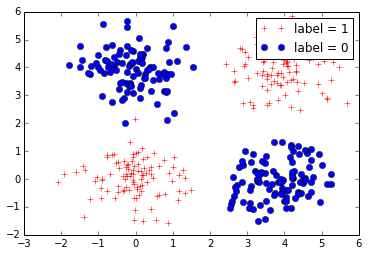

In [2]:
N = 100
data = np.concatenate((np.random.multivariate_normal(mean=[0, 0], cov=[[0.5, 0],[0, 0.5]], size=N), \
                       np.random.multivariate_normal(mean=[4, 4], cov=[[0.5, 0],[0, 0.5]], size=N), \
                       np.random.multivariate_normal(mean=[0, 4], cov=[[0.5, 0],[0, 0.5]], size=N), \
                       np.random.multivariate_normal(mean=[4, 0], cov=[[0.5, 0],[0, 0.5]], size=N)), axis=0)

# Arrays are explicitly defined as (N x 1) for convenience allowing generlizations to netowrks with multidimensional outputs
labels = np.concatenate((np.ones((2*N, 1)), np.zeros((2*N, 1))), axis=0)

plt.plot(data[labels[:,0] == 1, 0], data[labels[:,0] == 1, 1], 'r+', label='label = 1')
plt.hold
plt.plot(data[labels[:,0] == 0, 0], data[labels[:,0] == 0, 1], 'bo', label='label = 0')
plt.legend()
plt.show()

## Defining the network
Let's define a multiple layer network to learn the XOR function. First, we need to instatiate an empty Net object. Then layers can be added from input to output layers by invoking the addLayer method of the Net object.

In [3]:
# instantiate an empty network  
my_net = DNN.Net()
# add layers to my_net in a bottom up fashion
my_net.addLayer(DNN.Layer(n_in=2, n_out=6, activation='relu'))
my_net.addLayer(DNN.Layer(n_in=6, n_out=1, activation='sigmoid'))


## Choosing a solver and seting up the net trainer

The solver class contains the methods that can be employed to compute the paramter updates. The solver function is to take the gradients of the cost function with respect to the network parameters and calculate the corresponding increments to the current network parameters. 

In [4]:

# create solver object for training the feedforward network 
solver_params = {'lr_rate': 0.001,  \
                 'momentum': 0.9}  
#my_solver = DNN.SGDSolver(solver_params)
#my_solver = DNN.NAGSolver(solver_params)
#my_solver = DNN.RMSPropSolver(solver_params)
#my_solver = DNN.AdaGradSolver(solver_params)
my_solver = Solvers.AdaDeltaSolver(solver_params)



Ignoring learning rate for AdaDeltaSolver


The NetTrainer takes a Net object along with the solver and adds a loss function that will be employed for trainer. The main function of the NetTrainer is to manage calls that propagate training data forward, backpropagate the errors (cost gradients), and perform parameter updates. The trainer requires the training data and target vales (aka labels), Solver and Net objects and additional information such as the number of iterations, batch sizes, and display of current objective values during training.  

In [5]:
# instantiate a NetTrainer to learn parameters of my_net using the my_solver 
train_params = {'net': my_net, \
                'loss_func': 'xent', \
                'batch_size': 10,  \
                'max_iter': 100000, \
                'train_data': data, \
                'label_data': labels, \
                'solver': my_solver, \
                'print_interval': 10000}
my_trainer = DNN.NetTrainer(train_params)

## Training the network
Once the NetTrainer object has been properly instantiated, training is justa  matter of invoking the train method. The trainer will run for the specified number of iterations and display the information accordingly.

In [6]:
my_trainer.train()

Iteration 0, objective = 0.742479
Iteration 10000, objective = 0.197912
Iteration 20000, objective = 0.099200
Iteration 30000, objective = 0.060468
Iteration 40000, objective = 0.157013
Iteration 50000, objective = 0.004333
Iteration 60000, objective = 0.046622
Iteration 70000, objective = 0.017313
Iteration 80000, objective = 0.007952
Iteration 90000, objective = 0.007016


## Checking the results
After training, the Net object paramters must have change to approximate the input-output relation implicit in the training data. We can forward propagate the data and observe the predicted outputs.

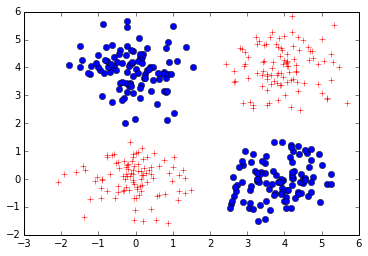

In [7]:
my_net.forward(data)
pred_labels = np.reshape(my_net.Xout > 0.5, -1)
## plot data point with the predicted labels
plt.plot(data[pred_labels, 0], data[pred_labels, 1], 'r+')
plt.hold
plt.plot(data[np.logical_not(pred_labels), 0], data[np.logical_not(pred_labels), 1], 'bo')
plt.show()